<h1 align='center' style="color: blue;">Image Recognition</h1>

For this project, I worked with the well-known Fashion MNIST dataset. This dataset comprises small images of various fashion items. The primary goal was to develop a series of supervised learning models capable of predicting the category of a fashion item based on its image. I explored and implemented a diverse range of models to achieve this objective.

Install `tensorflow V2` package

In [1]:
# !pip install --upgrade tensorflow

Check the version of the package.

In [102]:
import tensorflow as tf
tf.__version__

'2.5.1'

The next step entails loading the dataset.

In [2]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As evident in the preceding code, the dataset has been divided into training and testing sets. Let's now inspect the contents of the X_train dataset.

In [3]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

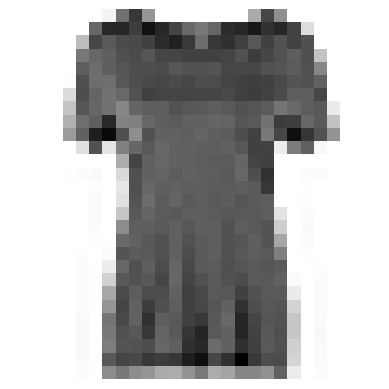

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [5]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [7]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt


<ul>
        <li>Utilized the training set to train a variety of supervised learning models and evaluated their performance using the test set.</li>
        <li>Employed different metrics for model evaluation, including accuracy, precision, AUC, and more.</li>
        <li>Interpreted the metrics for each model to gain insights into their performance and strengths/ weaknesses.</li>
        <li>Utilized cross-validation methods to fine-tune hyperparameters, enhancing model performance.</li>
        <li> Compared the performance of different models.</li>
        <li> Identified and specified the model that outperformed the others, highlighting the best-performing model.
</ul>


We're dealing with photographs that are 28x28 in this data set; let's first examine the type of data we have in terms of shape and values.

In [139]:
print("Shape of y_train is ",y_train.shape)
print("Shape of X_train is ",X_train.shape)
print("Shape of X_test is ",X_test.shape)
print("Shape of y_test is ",y_test.shape)

Shape of y_train is  (60000,)
Shape of X_train is  (60000, 28, 28)
Shape of X_test is  (10000, 28, 28)
Shape of y_test is  (10000,)


In [110]:
import numpy as np
np.unique(X_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

The pixels, as may be seen above, fall between 0 and 255. Processing pixels with more values and a higher variance becomes more difficult when images are fed via a model (as pixel values) for training. In order to bring the range between 0 and 1 and normalize the pixels, this is a recommended approach.

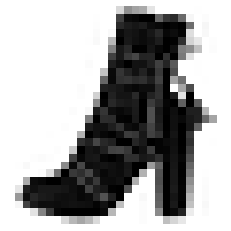

In [142]:
#Normalizing both train and test data so that the model works equally for both.
X_train=X_train/255.0
X_test=X_test/255.0

#visualizing one of the image after normalizing to see if it worked proeprly or not
sample_image = X_train[11]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

Arranging the data into a feature matrix and target array is another step in getting it ready for the model. The target array is already configured, but the train and test data need to be converted from three dimensions to two.

In [143]:
X_train=X_train.reshape(60000,28*28)
X_test=X_test.reshape(10000,28*28)
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

Running Logistic Regression initially using the "liblinear" solver and the "ovr" multi-class. This strategy's interpretability is one of its benefits. Since only one classifier is used to represent each class, it is possible to learn more about the class by looking at its related classifier.

In [113]:
#logistic with multiclass classification
from sklearn.linear_model import LogisticRegression
logregressor = LogisticRegression(solver="liblinear", multi_class="ovr")
logregressor.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [114]:
from sklearn.metrics import accuracy_score
#out of sample accuracy
y_logreg_hat=logregressor.predict(X_test)
print("Out of sample accuracy is ",accuracy_score(y_test,y_logreg_hat, normalize = True) * 100 )

#In-sample accuracy
y_train_logreg_hat=logregressor.predict(X_train)
print("In-sample accuracy is ",accuracy_score(y_train,y_train_logreg_hat, normalize = True) * 100 )


Out of sample accuracy is  84.11
In-sample accuracy is  87.325


As we can see from the example above, the model is rather overfitting, thus we can use grid search to send the C (penalty) parameter to the logistic regression model. C is included as a penalty to lower overfitting.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# making skeletal model
logistic_regression = LogisticRegression(solver="liblinear", multi_class="ovr",n_jobs = -1)

# Set of parameters we want to try for out Model
parameters = { 'C' : [1.1,1.25,1.5]}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = logistic_regression, param_grid = parameters , scoring = 'accuracy', cv = 5, n_jobs = -1 , verbose = 2)
grid_scores = grid_search.fit(X_train, y_train)

Investigating the optimum logical regression inputs.

In [116]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.8526333333333334
{'C': 1.1}


In [118]:
# Making the Final Classification model.
logistic_regression = LogisticRegression(solver="liblinear", multi_class="ovr", C = 1.1)
logistic_regression.fit(X_train,y_train)


LogisticRegression(C=1.1, multi_class='ovr', solver='liblinear')

In [119]:
y_hat=logistic_regression.predict(X_test)
y_train_hat=logistic_regression.predict(X_train)

In [120]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_hat, normalize = True) * 100 )
print(accuracy_score(y_train,y_train_hat, normalize = True) * 100 )


84.09
87.33666666666666


In [41]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.74      0.77      0.76      1000
           3       0.83      0.88      0.85      1000
           4       0.76      0.78      0.77      1000
           5       0.95      0.93      0.94      1000
           6       0.68      0.60      0.63      1000
           7       0.91      0.94      0.92      1000
           8       0.95      0.96      0.96      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.85      0.85      0.85     10000



Model 2- Random Forest 

Without any hyperparameters, I tried using random forest, but the model was overfitting (There was a technical issue and because of that I am not able to show that the model overfitted the data)
I discovered that supplying hyperparameters like "max depth" would be helpful in resolving the overfitting issue.
I used GridSearchCV to get the optimal depth, and then I used the best random forest parameters.

In [31]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_jobs=-1)


GridSearchCV for Random Forest

In [33]:
from sklearn.model_selection import GridSearchCV

# Set of parameters we want to try for out Model
parameters = { 'n_estimators' : [30,40,50,60,70,80],'max_depth':[6,7,8,9,10]}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = random_forest_model, param_grid = parameters , scoring = 'accuracy', cv = 2, n_jobs = -1 , verbose = 2)
grid_scores = grid_search.fit(X_train , y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


In [35]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.8525833333333334
{'max_depth': 10, 'n_estimators': 70}


for fitting a random forest model, using the best hyperparameter.

In [37]:
best_RF_model=RandomForestClassifier(n_estimators=70,n_jobs=-1,max_depth=10)
best_RF_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=70, n_jobs=-1)

In [39]:
from sklearn.metrics import accuracy_score
#out of sample accuracy
y_pred = best_RF_model.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)
#checking in-sample accuracy as well
y_train_pred = best_RF_model.predict(X_train)
print(accuracy_score(y_train, y_train_pred)*100)

84.36
88.125


In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1000
           1       0.99      0.94      0.96      1000
           2       0.71      0.73      0.72      1000
           3       0.82      0.90      0.85      1000
           4       0.68      0.80      0.74      1000
           5       0.98      0.93      0.95      1000
           6       0.69      0.49      0.58      1000
           7       0.90      0.92      0.91      1000
           8       0.95      0.96      0.96      1000
           9       0.91      0.94      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Model 3- MLPCLAssifier (Neural network)

I utilized Gridsearch in this case to obtain the optimal number of hyperparameter.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
NNmodel = MLPClassifier(solver='lbfgs',random_state=0, 
                      hidden_layer_sizes=[30])
# Set of parameters we want to try for out Model
parameters = { 'hidden_layer_sizes' : [30,40,50,60,70,80]}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = NNmodel, param_grid = parameters , scoring = 'accuracy', cv = 2, n_jobs = -1 , verbose = 2)
grid_scores = grid_search.fit(X_train , y_train)

In [147]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.8712333333333333
{'hidden_layer_sizes': 70}


As can be seen above, 70 is the ideal number of concealed layers (from the list provided).

In [ ]:
from sklearn.neural_network import MLPClassifier

NNmodel = MLPClassifier(solver='lbfgs',random_state=0, 
                      hidden_layer_sizes=[70])
NNmodel.fit(X_train,y_train)

# check the accuracy
y_train_hat = NNmodel.predict(X_train)
y_test_hat = NNmodel.predict(X_test)


In [149]:
from sklearn.metrics import accuracy_score

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  89.00833333333334
Out-of-sample Accuracy:  86.75


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.74      0.77      0.76      1000
           3       0.83      0.88      0.85      1000
           4       0.76      0.78      0.77      1000
           5       0.95      0.93      0.94      1000
           6       0.68      0.60      0.63      1000
           7       0.91      0.94      0.92      1000
           8       0.95      0.96      0.96      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# Upon a comprehensive evaluation encompassing metrics including accuracy, as well as other critical indicators such as recall and precision, I have arrived at the determination that the most optimal choice is the third model, namely, the MLPClassifier.

 <ul>   <li>Using the Best Model for Predicting Your Fashion Pieces</li>
        <li>Capture images of five of your own fashion pieces. Ensure that the images are taken in a square format.</li>
        <li>Resize these images to the correct size, which is 28x28 pixels.</li>
        <li>Convert the images to grayscale to simplify the data.</li>
        <li>Create a visualization where all these images are displayed side by side for a comprehensive view.</li>
        <li>Utilize the best model selected in previous task to predict the label or category of each of your fashion piece images.</li>
        <li>Assess the accuracy of the final results. How well did the model perform in categorizing your fashion pieces based on the images you provided?</li>
    </ul>
</ul>

In [187]:
#Importing required libraries
from PIL import Image
import numpy as np
import glob
import numpy as np                          
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

Preparing and loading the custom photos for prediction

In [207]:
#creating an empty list for resized images
custom_image_list=[]             
image_resized_list=[]             

for filename in glob.glob("./Test_Data/*.png"):         #running a for loop to get the images in the image list
    testing=Image.open(filename)
    custom_image_list.append(testing)

In [208]:
for image in image_list:
    image.show()
    image=image.resize((28,28))          #reshaping the images in the list to appropriate size 
    image_resized_list.append(image)

In [209]:
for (i, j) in enumerate (image_resized_list):
    j.save('{}{}{}'.format('./Resize/image',i+1,'.png'))     #Saving the resized images in a new folder

In [211]:
#reading the images into new variables 
image1=np.array(mpimg.imread("Resize/image1.png"))
image2=np.array(mpimg.imread("Resize/image2.png"))
image3=np.array(mpimg.imread("Resize/image3.png"))
image4=np.array(mpimg.imread("Resize/image4.png"))
image5=np.array(mpimg.imread("Resize/image5.png"))


In [212]:
#Gray scaling images 
import warnings
warnings.filterwarnings("ignore")
from skimage import color
from skimage import io

gray_img_1 = color.rgb2gray(io.imread('Resize/image1.png'))
gray_img_2 = color.rgb2gray(io.imread('Resize/image2.png'))      
gray_img_3 = color.rgb2gray(io.imread('Resize/image3.png'))
gray_img_4 = color.rgb2gray(io.imread('Resize/image4.png'))
gray_img_5 = color.rgb2gray(io.imread('Resize/image5.png'))

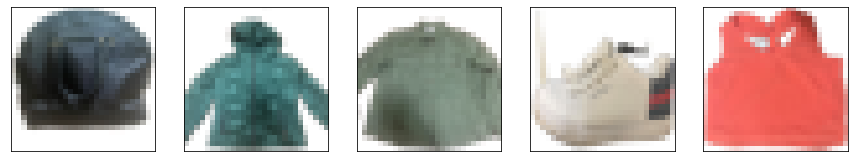

In [213]:
#Before gray scaling
fig, ax=plt.subplots(1,5,figsize=(15,15))
for i, axi in enumerate(ax.flat):
    axi.imshow(resized_list[i], cmap='binary')     
    axi.set(xticks=[],yticks=[])

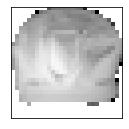

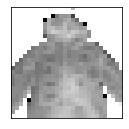

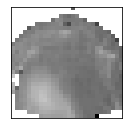

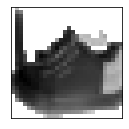

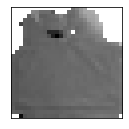

In [214]:
#after gray scaling

fig, ax= plt.subplots(figsize=(2,3))
ax.imshow(gray_img_1, cmap='binary')
ax.set(xticks=[], yticks=[])
plt.show()

fig, ax= plt.subplots(figsize=(2,3))
ax.imshow(gray_img_2, cmap='binary')
ax.set(xticks=[], yticks=[])
plt.show()

fig, ax= plt.subplots(figsize=(2,3))
ax.imshow(gray_img_3, cmap='binary')
ax.set(xticks=[], yticks=[])
plt.show()

fig, ax= plt.subplots(figsize=(2,3))
ax.imshow(gray_img_4, cmap='binary')
ax.set(xticks=[], yticks=[])
plt.show()

fig, ax= plt.subplots(figsize=(2,3))
ax.imshow(gray_img_5, cmap='binary')
ax.set(xticks=[], yticks=[])
plt.show()

In [215]:
#appending binary images in a list and visualize

preprocessed_list_image=[]                                
preprocessed_list_image.append(gray_img_1)
preprocessed_list_image.append(gray_img_2)
preprocessed_list_image.append(gray_img_3)
preprocessed_list_image.append(gray_img_4)
preprocessed_list_image.append(gray_img_5)

In [216]:
#Prediction for custom images
new_prediction_array=np.array(preprocessed_list_image)

In [217]:
print(new_prediction_array[0].shape)             #shape of an element in an array

new_prediction_array = new_prediction_array.astype('float32')      #reshaping the array- similar to data
new_prediction_array /= 255.0
print(new_prediction_array.shape)

(28, 28)
(5, 28, 28)


converting the array's form from 3D to 2D

In [219]:
new_prediction_array=new_prediction_array.reshape(5,28*28)

In [220]:
y_new_data_hat = NNmodel.predict(newarray)


In [221]:
y_new_data_hat


array([5, 5, 5, 5, 5], dtype=uint8)

### As evident from the analysis, the model presently faces challenges in delivering precise forecasts for the majority of the photographs. To enhance its predictive capabilities using the original dataset images, further refinement and augmentation of the image data will be necessitated. This iterative process aims to improve the model's overall performance and ensure more accurate outcomes in image forecasting.





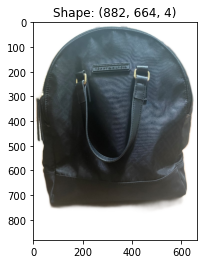

In [222]:
from PIL import Image
 
filename = './Test_Data/Bag.png'
 
image = Image.open(filename)
p = plt.imshow(np.asarray(image), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image).shape))

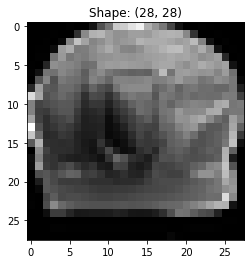

In [223]:
# convert to grayscale image - 'L' format means each pixel is 
# represented by a single value from 0 to 255
image_bw = image.convert('L')
p = plt.imshow(np.asarray(image_bw), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image_bw).shape))
# resize image 
image_bw_resized = image_bw.resize((28,28), Image.ANTIALIAS)
p = plt.imshow(np.asarray(image_bw_resized), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image_bw_resized).shape))

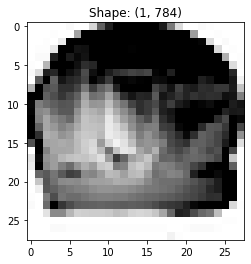

In [224]:
import PIL.ImageOps    

image_bw_resized_inverted = PIL.ImageOps.invert(image_bw_resized)
p = plt.imshow(np.asarray(image_bw_resized_inverted), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image_bw_resized_inverted).shape))

# adjust contrast and scale
pixel_filter = 20 # value from 0 to 100 - may need to adjust this manually
min_pixel = np.percentile(image_bw_resized_inverted, pixel_filter)
image_bw_resized_inverted_scaled = np.clip(image_bw_resized_inverted-min_pixel, 0, 255)
max_pixel = np.max(image_bw_resized_inverted)
image_bw_resized_inverted_scaled = np.asarray(image_bw_resized_inverted_scaled)/max_pixel
p = plt.imshow(np.asarray(image_bw_resized_inverted_scaled), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image_bw_resized_inverted_scaled).shape))

# finally, reshape to (1, 784) - 1 sample, 784 features
test_sample = np.array(image_bw_resized_inverted_scaled).reshape(1,784)
p = plt.imshow(np.reshape(test_sample, (28,28)), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(test_sample.shape))
p = plt.imshow(np.reshape(test_sample, (28,28)), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(test_sample.shape))

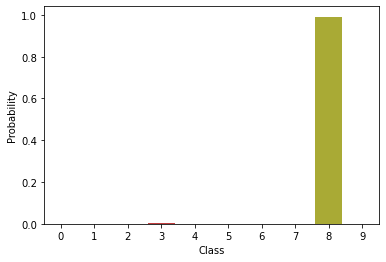

In [225]:
import seaborn as sns
test_probs = NNmodel.predict_proba(test_sample)

sns.barplot(np.arange(0,10), test_probs.squeeze());
plt.ylabel("Probability");
plt.xlabel("Class");